In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error
from torch_geometric.loader import DataLoader

from exploration.dataset import PyGAcademicGraph

from utils import train, evaluate

from exploitation.models import LinearRegression

In [2]:
batch_size = 1

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="transductive")
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="transductive")
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="transductive")
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 36936], y=[359], x=[359, 8], edge_attr=[36936, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 357, 358, 358],
        [  1,  89, 121,  ..., 352,  89, 358]])
Number of features per node:  8


In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)


num_epochs = 100
linear_regression = LinearRegression(
    input_size=n_features,
    output_size=1).to(device)

loss_fcn = nn.MSELoss()

optimizer = torch.optim.Adam(linear_regression.parameters(), lr=0.005)

epoch_list, linear_regression_MSEs = train(linear_regression, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)


Device:  cpu
Epoch 00001 | Loss: 0.1409
MSE: 0.1425
Epoch 00002 | Loss: 0.1394
Epoch 00003 | Loss: 0.1388
Epoch 00004 | Loss: 0.1382
Epoch 00005 | Loss: 0.1371
Epoch 00006 | Loss: 0.1360
MSE: 0.1407
Epoch 00007 | Loss: 0.1346
Epoch 00008 | Loss: 0.1326
Epoch 00009 | Loss: 0.1297
Epoch 00010 | Loss: 0.1224
Epoch 00011 | Loss: 0.1033
MSE: 0.1035
Epoch 00012 | Loss: 0.0972
Epoch 00013 | Loss: 0.0758
Epoch 00014 | Loss: 0.0833
Epoch 00015 | Loss: 0.0976
Epoch 00016 | Loss: 0.0699
MSE: 0.0652
Epoch 00017 | Loss: 0.0755
Epoch 00018 | Loss: 0.0880
Epoch 00019 | Loss: 0.0573
Epoch 00020 | Loss: 0.0452
Epoch 00021 | Loss: 0.0496
MSE: 0.0631
Epoch 00022 | Loss: 0.0544
Epoch 00023 | Loss: 0.0555
Epoch 00024 | Loss: 0.0836
Epoch 00025 | Loss: 0.0732
Epoch 00026 | Loss: 0.0345
MSE: 0.0353
Epoch 00027 | Loss: 0.0279
Epoch 00028 | Loss: 0.0450
Epoch 00029 | Loss: 0.0710
Epoch 00030 | Loss: 0.0504
Epoch 00031 | Loss: 0.0470
MSE: 0.0553
Epoch 00032 | Loss: 0.0491
Epoch 00033 | Loss: 0.0309
Epoch 00034

Linear regression : MSE on the test set: 0.0230


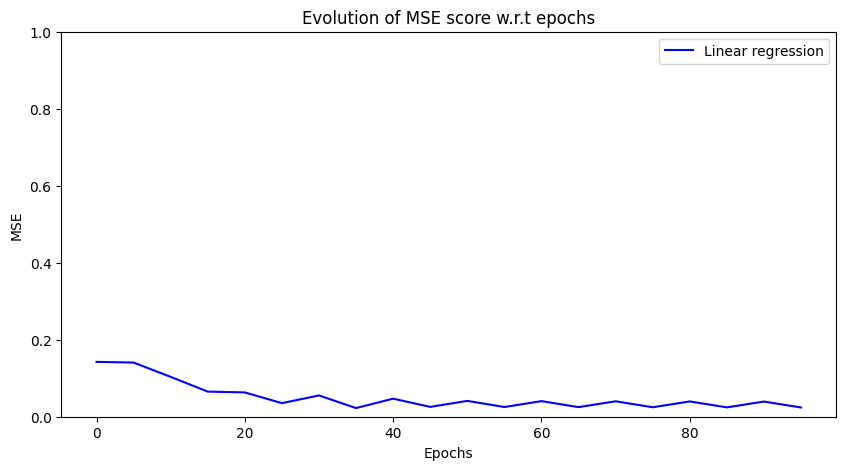

In [7]:

MSE_test = evaluate(linear_regression, loss_fcn, device, test_dataloader)
print("Linear regression : MSE on the test set: {:.4f}".format(MSE_test))

def plot_MSE_score(epoch_list, MSE_scores) :
    plt.figure(figsize = [10,5])
    plt.plot(epoch_list, MSE_scores, 'b', label="Linear regression")
    plt.title("Evolution of MSE score w.r.t epochs")
    plt.ylim([0.0, 1.0])
    plt.ylabel("MSE")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()
    
plot_MSE_score(epoch_list, linear_regression_MSEs)